In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv("model3_augmented_data.csv",encoding= 'unicode_escape')

In [3]:
df.head()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats,Target
0,2.50,0.0416,0.0104,0.0208,0.750,1.75,1.25,1.00,0.0,0.06240,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
1,2.00,0.0416,0.0208,0.0208,0.000,1.50,1.00,0.00,0.0,0.03120,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
2,0.25,0.0000,0.0000,0.0026,0.500,0.50,0.50,0.00,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0
3,0.33,0.0000,0.0000,0.0052,0.125,1.00,0.75,0.75,0.0,0.02704,...,0.0,0.0,0.0,0.0,0.0,0.00,0.5,0.0,0.0,0
4,3.67,0.0416,0.0156,0.0208,1.500,2.00,1.25,1.50,0.0,0.06240,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0


In [4]:
df.tail()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats,Target
2257,15.0,0.0000,0.2496,0.0312,2.355,6.0,3.0,0.0,0.0000,0.00000,...,0.00,0.0,6.0,4.5,0.0,0.0,0.0,0.0,0.0,2
2258,18.0,0.1248,0.0624,0.0624,6.000,6.0,4.5,0.0,0.0000,0.37440,...,0.00,0.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,2
2259,27.0,0.3744,0.0624,0.0624,6.000,6.0,6.0,0.0,0.0000,0.00000,...,0.00,0.0,12.0,6.0,0.0,0.0,0.0,6.0,0.0,2
2260,21.0,0.0000,0.2496,0.1872,0.000,13.5,6.0,0.0,0.0000,0.13104,...,4.02,0.0,12.0,0.0,0.0,0.0,0.0,6.0,3.0,2
2261,25.5,0.0000,0.0000,0.3744,0.000,0.0,0.0,0.0,0.3744,0.00000,...,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [5]:
df.dtypes

Flour              float64
Baking_powder      float64
Baking_soda        float64
Salt               float64
Butter             float64
Sugar              float64
Eggs               float64
Milk               float64
Yeast              float64
Vanilla_extract    float64
Cream              float64
Oil                float64
Cheese             float64
Water              float64
Cocoa_powder       float64
Fruits             float64
Nuts               float64
Other_powder       float64
Chocolate          float64
Juice              float64
Honey              float64
Oats               float64
Target               int64
dtype: object

In [6]:
df.describe()

,Flour,Baking_powder,Baking_soda,Salt,Butter,Sugar,Eggs,Milk,Yeast,Vanilla_extract,...,Water,Cocoa_powder,Fruits,Nuts,Other_powder,Chocolate,Juice,Honey,Oats,Target
count,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,...,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,8.211956,0.049724,0.041155,0.041566,1.819559,3.869264,1.736074,0.785365,0.018586,0.106188,...,0.582722,0.168408,1.509363,0.726621,0.101459,0.995782,0.174211,0.416426,0.393495,0.978780
std,6.326775,0.075206,0.065691,0.043607,1.829792,3.302292,1.861341,1.748262,0.054562,0.101614,...,1.816699,0.661549,3.007885,1.726570,0.571002,2.082710,0.745030,1.225291,2.001221,0.810966
min,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.515625,0.000000,0.000000,0.010400,0.250000,1.432500,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.750000,0.010400,0.020800,0.031200,1.500000,3.000000,1.250000,0.000000,0.000000,0.083200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.250000,0.083200,0.062400,0.059800,3.000000,6.000000,2.500000,0.500000,0.000000,0.166400,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,54.000000,0.561600,1.310400,0.374400,10.500000,30.000000,18.000000,12.000000,0.374400,0.468000,...,19.500000,5.400000,24.000000,15.000000,7.500000,18.000000,12.000000,12.000000,24.000000,2.000000


In [8]:
df.isnull().sum()

Flour              0
Baking_powder      0
Baking_soda        0
Salt               0
Butter             0
Sugar              0
Eggs               0
Milk               0
Yeast              0
Vanilla_extract    0
Cream              0
Oil                0
Cheese             0
Water              0
Cocoa_powder       0
Fruits             0
Nuts               0
Other_powder       0
Chocolate          0
Juice              0
Honey              0
Oats               0
Target             0
dtype: int64

## Feature Selection

### 1. Correlation Matrix with heatmap

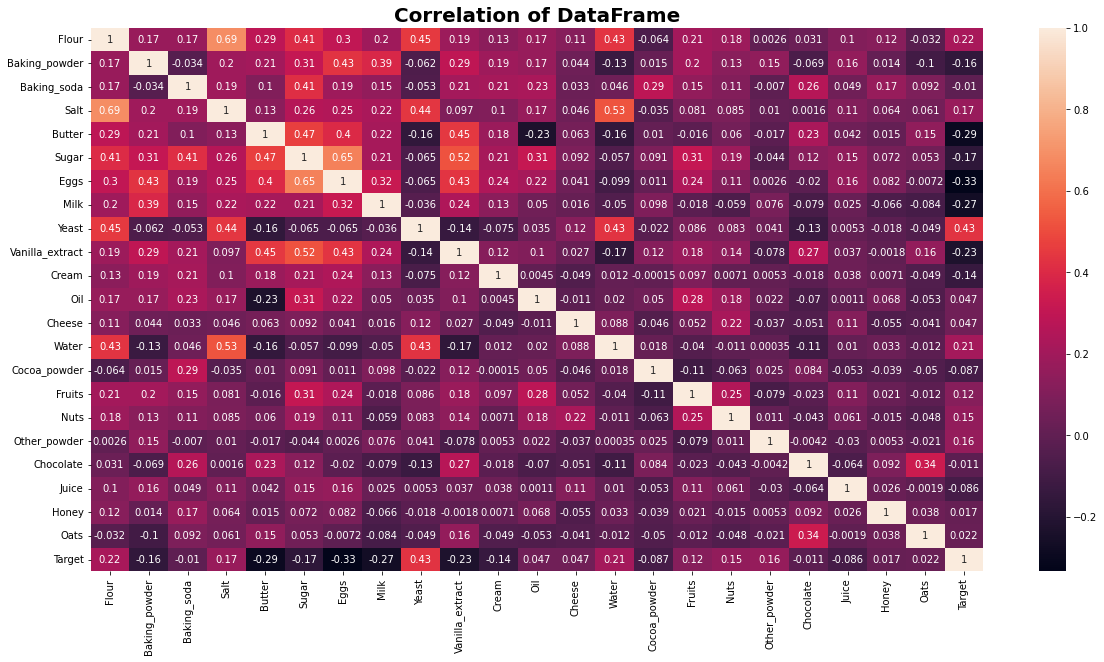

In [8]:
plt.figure(figsize=(20, 10))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(df.corr(),annot=True);

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


### 3.ExtraTreesClassifier method

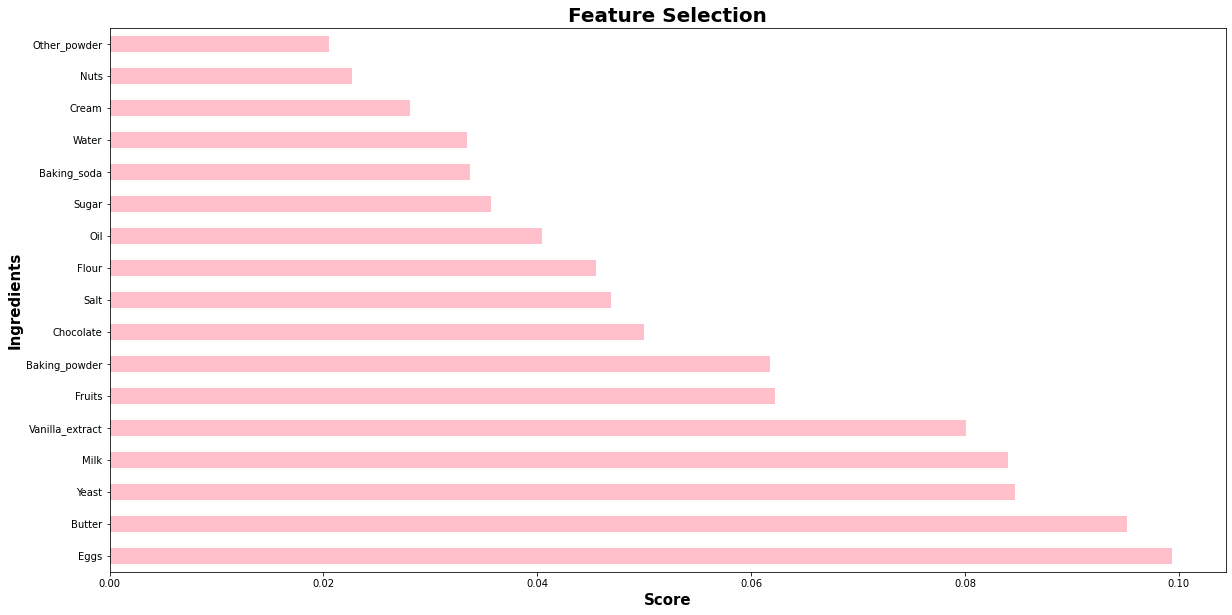

In [10]:
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(20, 10))
plt.title("Feature Selection",size='20',weight='bold')
plt.ylabel("Ingredients",size = '15',weight = 'bold')
plt.xlabel("Score",size = '15',weight = 'bold')
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
feat_importance.nlargest(17).plot(kind = 'barh',color='pink')
plt.show()

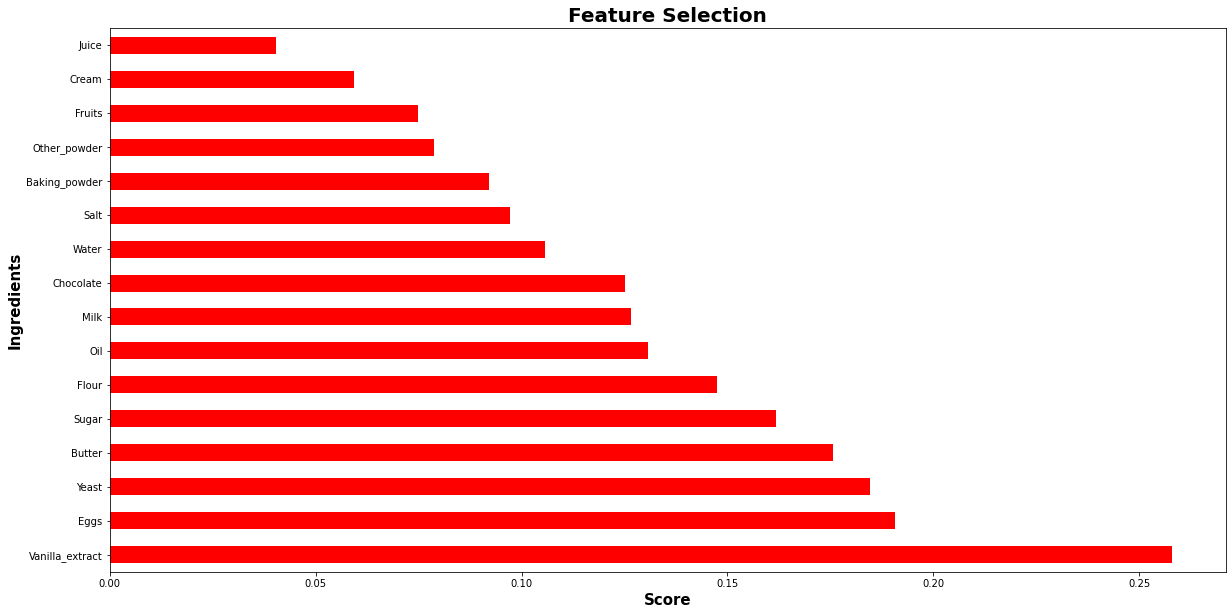

In [11]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y,random_state=2)
plt.figure(figsize=(20, 10))
plt.title("Feature Selection",size='20',weight='bold')
plt.ylabel("Ingredients",size = '15',weight = 'bold')
plt.xlabel("Score",size = '15',weight = 'bold')
mutual_data = pd.Series(mutual_info,index = X.columns)
mutual_data.nlargest(16).plot(kind = 'barh',color = 'red')
plt.show()

In [7]:
new_df = df[['Flour','Sugar','Butter','Milk','Eggs','Oil','Water','Other_powder','Fruits','Chocolate','Cream','Juice','Yeast','Vanilla_extract','Baking_powder','Salt','Target']]
X = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values

## Feature Encoding

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Data Splitting

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,shuffle = True)

## Handling Imbalanced data

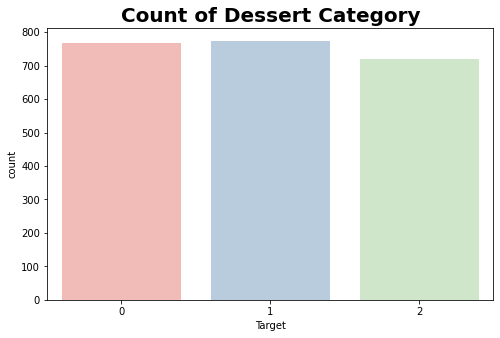

In [123]:
plt.figure(figsize=(8, 5))
plt.title("Count of Dessert Category",size='20',weight='bold')
plt.xlabel("",size='10')
plt.ylabel("",size='10')
sns.countplot(df.Target,palette='Pastel1');

### Over Sampling minority class using Synthetic Minority Oversampling Technique(SMOTE)

In [10]:
smk = SMOTETomek()
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

## Feature Scaling

In [11]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Model Training

In [18]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       150
           1       0.93      0.98      0.96       159
           2       0.92      0.90      0.91       150

    accuracy                           0.93       459
   macro avg       0.93      0.92      0.92       459
weighted avg       0.93      0.93      0.93       459



In [20]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       606
           1       0.93      0.97      0.95       615
           2       0.94      0.89      0.91       614

    accuracy                           0.92      1835
   macro avg       0.92      0.92      0.92      1835
weighted avg       0.92      0.92      0.92      1835



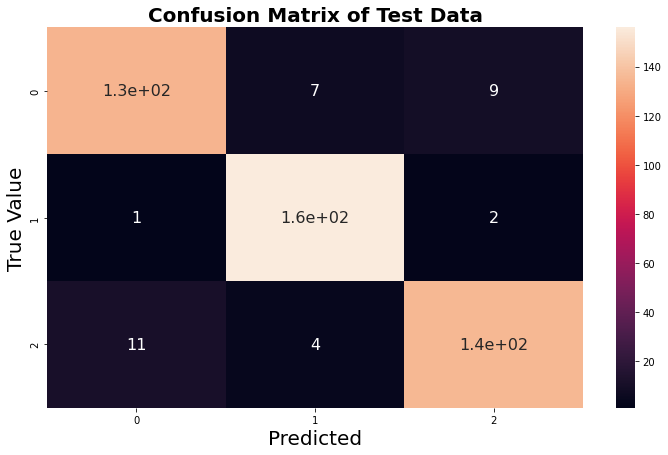

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# SVM


In [22]:
svcClassifier = SVC()
svcClassifier.fit(X_train, y_train)

SVC()

In [23]:
y_pred = svcClassifier.predict(X_test)
y_pred_train = svcClassifier.predict(X_train)

In [24]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [25]:
print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[559  10  37]
 [ 27 605  16]
 [ 20   0 561]]

Confusion matrix of Test Data

[[129   2  11]
 [ 10 157   1]
 [ 11   0 138]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       150
           1       0.93      0.99      0.96       159
           2       0.93      0.92      0.92       150

    accuracy                           0.92       459
   macro avg       0.92      0.92      0.92       459
weighted avg       0.92      0.92      0.92       459



In [27]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       606
           1       0.93      0.98      0.96       615
           2       0.97      0.91      0.94       614

    accuracy                           0.94      1835
   macro avg       0.94      0.94      0.94      1835
weighted avg       0.94      0.94      0.94      1835



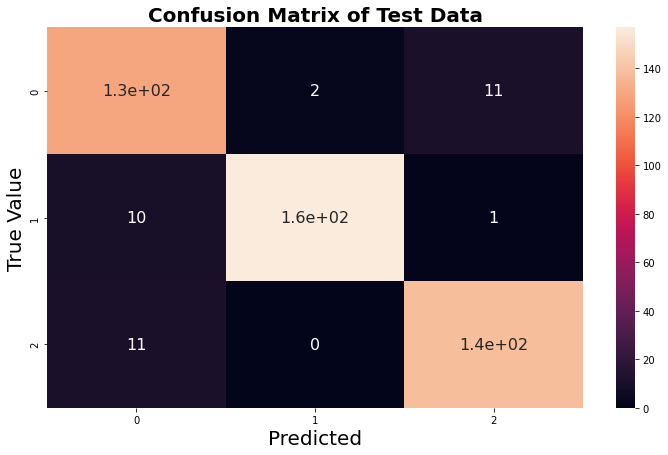

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [30]:
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [31]:
y_pred = model_gbm.predict(X_test)
y_pred_train = model_gbm.predict(X_train)

In [32]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.95      0.97      0.96       159
           2       0.92      0.93      0.92       150

    accuracy                           0.93       459
   macro avg       0.93      0.92      0.92       459
weighted avg       0.93      0.93      0.93       459



In [34]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       606
           1       0.98      1.00      0.99       615
           2       0.99      0.98      0.99       614

    accuracy                           0.99      1835
   macro avg       0.99      0.99      0.99      1835
weighted avg       0.99      0.99      0.99      1835



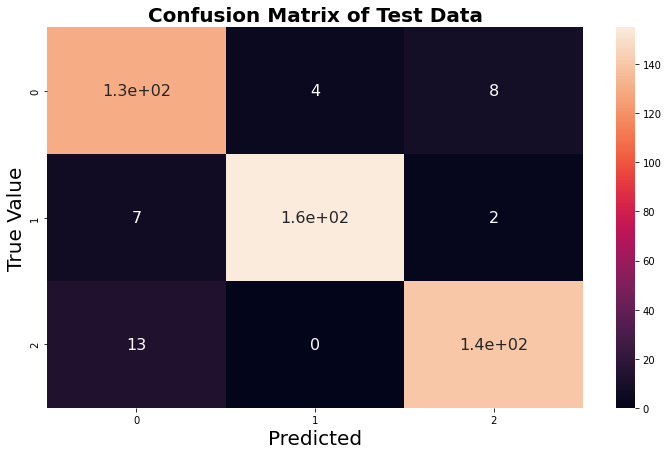

In [35]:
# Visualizing Confusion matrix for Gradient Boosted Tree
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# Naive Bayes Model

In [36]:
from sklearn.naive_bayes import GaussianNB
gaunb = GaussianNB()
gaunb.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = gaunb.predict(X_test)
y_pred_train = gaunb.predict(X_train)

In [38]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [39]:
print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[426  14 210]
 [177 596  79]
 [  3   5 325]]

Confusion matrix of Test Data

[[104   2  51]
 [ 45 155  15]
 [  1   2  84]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       150
           1       0.72      0.97      0.83       159
           2       0.97      0.56      0.71       150

    accuracy                           0.75       459
   macro avg       0.78      0.74      0.74       459
weighted avg       0.78      0.75      0.74       459



In [41]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       606
           1       0.70      0.97      0.81       615
           2       0.98      0.53      0.69       614

    accuracy                           0.73      1835
   macro avg       0.78      0.73      0.73      1835
weighted avg       0.78      0.73      0.73      1835



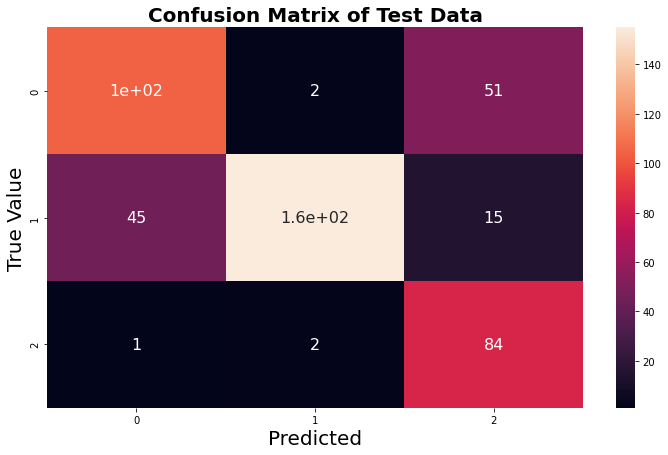

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# Decision Tree Classifier

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [44]:
clf_entropy= DecisionTreeClassifier()
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = clf_entropy.predict(X_test)
y_pred_train = clf_entropy.predict(X_train)

In [46]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       150
           1       0.96      0.97      0.96       159
           2       0.93      0.92      0.92       150

    accuracy                           0.92       459
   macro avg       0.92      0.92      0.92       459
weighted avg       0.92      0.92      0.92       459



In [48]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



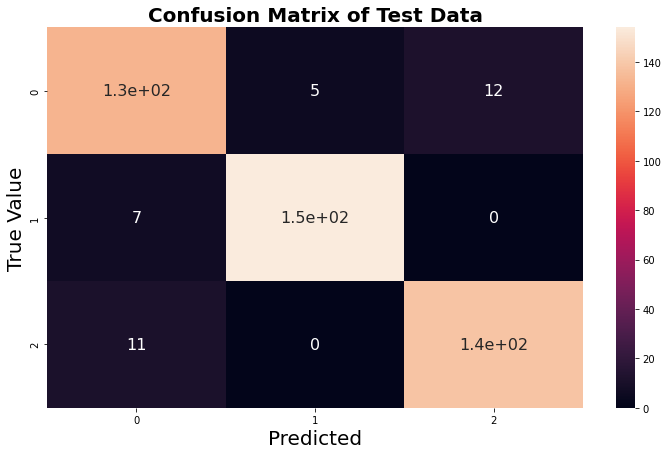

In [49]:
# Visualizing Confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

# KNN


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [53]:
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       150
           1       0.98      0.96      0.97       159
           2       0.98      0.89      0.93       150

    accuracy                           0.94       459
   macro avg       0.94      0.94      0.94       459
weighted avg       0.95      0.94      0.94       459



In [55]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       606
           1       0.98      0.99      0.98       615
           2       1.00      0.93      0.97       614

    accuracy                           0.97      1835
   macro avg       0.97      0.97      0.97      1835
weighted avg       0.97      0.97      0.97      1835



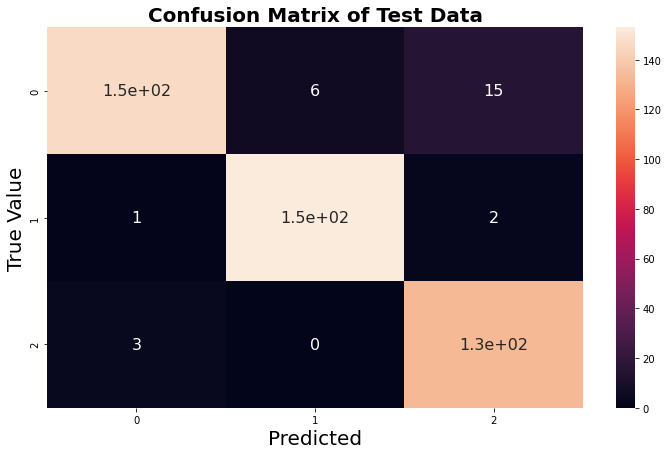

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

In [57]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

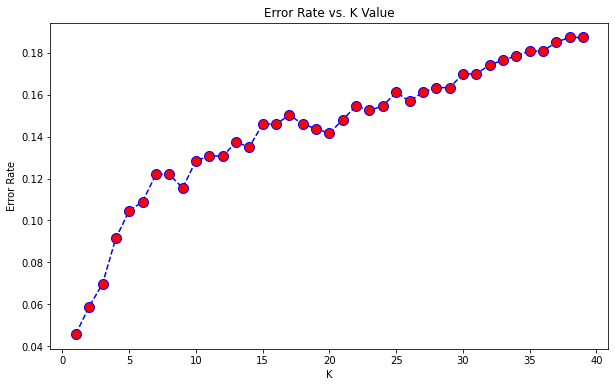

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Random Forest

In [63]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)



Confusion matrix of Train Data

[[606   0   0]
 [  0 615   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[138   3   9]
 [  6 156   1]
 [  6   0 140]]


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       150
           1       0.96      0.98      0.97       159
           2       0.96      0.93      0.95       150

    accuracy                           0.95       459
   macro avg       0.95      0.94      0.94       459
weighted avg       0.95      0.95      0.95       459



In [65]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



## XG Boost Classifier

In [66]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[606   0   0]
 [  0 615   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[143   3   8]
 [  2 156   1]
 [  5   0 141]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.98      0.98      0.98       159
           2       0.97      0.94      0.95       150

    accuracy                           0.96       459
   macro avg       0.96      0.96      0.96       459
weighted avg       0.96      0.96      0.96       459



In [68]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



## Light GBM classifier

In [69]:
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)


Confusion matrix of Train Data

[[606   0   0]
 [  0 615   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[141   5   8]
 [  4 154   0]
 [  5   0 142]]


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.97      0.97      0.97       159
           2       0.97      0.95      0.96       150

    accuracy                           0.95       459
   macro avg       0.95      0.95      0.95       459
weighted avg       0.95      0.95      0.95       459



In [71]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



## Hyperparameter Tuning

In [16]:
#Hyperparameter tuning on Logistic Regression
model = LogisticRegression()
solvers = ['lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best score: 0.922148 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Confusion matrix of Train Data

[[552  13  39]
 [ 19 602  23]
 [ 33   2 552]]

Confusion matrix of Test Data

[[131   2  15]
 [ 10 155   3]
 [ 12   2 135]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       153
           1       0.92      0.97      0.95       159
           2       0.91      0.88      0.89       153

    accuracy                           0.91       465
   macro avg       0.90      0.90      0.90       465
weighted avg       0.90      0.91      0.90       465

Classification report of Train Data
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       604
           1       0.93      0.98      0.95       617
           2       0.94      0.90      0.92       614

    accuracy                           0.93      1835
   macro avg       0.93      0.93      

In [12]:
#Hyperparameter tuning on SVM
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.962111 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

Confusion matrix of Train Data

[[587   4   5]
 [  5 610   4]
 [ 10   1 601]]

Confusion matrix of Test Data

[[139   0   2]
 [  3 158   0]
 [  7   0 148]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       149
           1       0.98      1.00      0.99       158
           2       0.95      0.99      0.97       150

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457

Classification report of Train Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       602
           1       0.99      0.99      0.99       615
           2       0.98      0.99      0.98       610

    accuracy                           0.98      1827
   macro avg       0.98      0.98      0.98      18

In [13]:
import pickle
with open('recipebuilder.pickle','wb') as f:
    pickle.dump(grid_result,f)

In [18]:
#Hyperparameter tuning on Random Forest
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.944486 using {'max_features': 'sqrt', 'n_estimators': 1000}

Confusion matrix of Train Data

[[604   0   0]
 [  0 617   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[139   3   7]
 [  6 156   3]
 [  8   0 143]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       153
           1       0.95      0.98      0.96       159
           2       0.95      0.93      0.94       153

    accuracy                           0.94       465
   macro avg       0.94      0.94      0.94       465
weighted avg       0.94      0.94      0.94       465

Classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       617
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      

In [9]:
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.850977 using {'alpha': 0.1}

Confusion matrix of Train Data

[[460   6  41]
 [ 78 609  68]
 [ 65   0 502]]

Confusion matrix of Test Data

[[119   0  14]
 [ 17 159  19]
 [ 16   0 119]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.89      0.78      0.84       152
           1       0.82      1.00      0.90       159
           2       0.88      0.78      0.83       152

    accuracy                           0.86       463
   macro avg       0.86      0.86      0.85       463
weighted avg       0.86      0.86      0.85       463

Classification report of Train Data
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       603
           1       0.81      0.99      0.89       615
           2       0.89      0.82      0.85       611

    accuracy                           0.86      1829
   macro avg       0.87      0.86      0.86      1829
weighted avg       0.87    

In [22]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.935536 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

Confusion matrix of Train Data

[[604   0   0]
 [  0 617   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[140   3   5]
 [  4 156   1]
 [  9   0 147]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       153
           1       0.97      0.98      0.97       159
           2       0.94      0.96      0.95       153

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.95      0.95      0.95       465

Classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       617
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.0

In [27]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.938807 using {'n_estimators': 1000}

Confusion matrix of Train Data

[[604   0   0]
 [  0 617   0]
 [  0   0 614]]

Confusion matrix of Test Data

[[135   5   9]
 [  9 153   4]
 [  9   1 140]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.92      0.96      0.94       159
           2       0.93      0.92      0.92       153

    accuracy                           0.92       465
   macro avg       0.92      0.92      0.92       465
weighted avg       0.92      0.92      0.92       465

Classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       617
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       

In [13]:
#Light GBM Classifier
model = LGBMClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.01, 0.1,0.05]
max_depth = [2, 3, 4]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

y_pred = grid_result.predict(X_test)
y_pred_train = grid_result.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print("\n")
print("Classification report of Test Data")
print(classification_report(y_test,y_pred))
print("Classification report of Train Data")
print(classification_report(y_train,y_pred_train))

Best: 0.966477 using {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000}

Confusion matrix of Train Data

[[603   0   0]
 [  0 615   0]
 [  0   0 611]]

Confusion matrix of Test Data

[[140   3   8]
 [  6 156   0]
 [  6   0 144]]


Classification report of Test Data
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       152
           1       0.96      0.98      0.97       159
           2       0.96      0.95      0.95       152

    accuracy                           0.95       463
   macro avg       0.95      0.95      0.95       463
weighted avg       0.95      0.95      0.95       463

Classification report of Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00       615
           2       1.00      1.00      1.00       611

    accuracy                           1.00      1829
   macro avg       1.00      1.00 

In [2]:
import pickle
model3 = pickle.load(open('recipebuilder.pickle', 'rb'))

In [3]:
def result(flour,sugar,butter,milk,egg,oil,water,powder,fruits,chocolate,cream,juice,yeast,extract,bakingpowder,salt):
    x = np.zeros(16)
    x[0] = flour
    x[1] = sugar
    x[2] = butter
    x[3] = milk
    x[4] = egg
    x[5] = oil
    x[6] = water
    x[7] = powder
    x[8] = fruits
    x[9] = chocolate
    x[10] = cream
    x[11] = juice
    x[12] = yeast
    x[13] = extract
    x[14] = bakingpowder
    x[15] = salt
    
    result = model3.predict([x])[0]
    
    ing = ['Flour','Sugar','Butter','Milk','Eggs','Oil','Water','Powder','Fruits','Chocolate','Cream','Juice','Yeast','Extract','Baking powder','Salt']
    count = 0
    new_ing = []
    for i in x:
        if i != 0:
            
            if ing[count] == 'Flour':
                f = int(i)
                new_ing.append(str(f) + str(" cup") + str(" all-purpose flour,spoon and levelled"))
                count = count+1
            elif ing[count] == 'Sugar':
                s = int(i)
                new_ing.append(str(s) + str(" cup") + str(" granulated sugar"))
                count = count+1
            elif ing[count] == 'Butter':
                b = int(i)
                new_ing.append(str(b) + str(" cup") + str(" unsalted butter,softened to room temperature"))
                count = count+1
            elif ing[count] == 'Milk':
                m = int(i)
                new_ing.append(str(m) + str(" cup") + str(" whole milk, room temperature"))
                count = count+1
            elif ing[count] == 'Eggs':
                egg = int(i/0.25)
                new_ing.append(str(egg) + str(" large eggs, at room temperature"))
                count = count+1
            elif ing[count] == 'Oil':
                o = int(i)
                new_ing.append(str(o) + str(" cup") + str(" extra-virgin oil"))
                count = count+1
            elif ing[count] == 'Water':
                w = int(i)
                new_ing.append(str(w) + str(" cup") + str(" hot water"))
                count = count+1
            elif ing[count] == 'Powder':
                p = int(i)
                new_ing.append(str(p) + str(" cup") + str(" unsweetened dutch-process powder, sifted"))
                count = count+1
            elif ing[count] == 'Fruits':
                f = int(i)
                new_ing.append(str(f) + str(" cup") + str(" chopped fresh or frozen fruits"))
                count = count+1
            elif ing[count] == 'Chocolate':
                c = int(i)
                new_ing.append(str(c) + str(" cup") + str(" roughly chopped chocolates or mini chocolate chips"))
                count = count+1
            elif ing[count] == 'Cream':
                cr = int(i)
                new_ing.append(str(cr) + str(" cup") + str(" full-fat sour cream, at room temperature"))
                count = count+1
            elif ing[count] == 'Juice':
                j = int(i)
                new_ing.append(str(j) + str(" cup") + str(" chopped fresh or frozen fruits"))
                count = count+1
            elif ing[count] == 'Yeast':
                new_ing.append(str(i) + str(" cup") + str(" instant or active dry yeast"))
                count = count+1
            elif ing[count] == 'Extract':
                new_ing.append(str(i) + str(" cup") + str(" pure vanilla extract or vanilla paste or other extracts"))
                count = count+1
            elif ing[count] == 'Baking powder':
                new_ing.append(str(i) + str(" cup") + str(" baking powder"))
                count = count+1
            elif ing[count] == 'Salt':
                new_ing.append(str(i) + str(" cup") + str(" salt or fine sea salt"))
                count = count+1
        else:
            count = count+1 
    if result == 0:
        print("Its a cake")
    elif result == 1:
        print("Its a cookie")
    else:
        print("Its a bread")


In [6]:
result(1,1,1,0,0.5,0,0,0,0,0,0,0,0,0.001,0.001,0.001)

Its a cake


In [7]:
result(1,0,1,0,0,0,0,0,0,0,0,0,0.001,0,0.001,0)

Its a bread
